# **Registros de acidentes em Brasília**

# **Bibliotecas**

In [26]:
#Bibliotecas 
import shapely as sh
import pandas as pd
import numpy as np #Matrizes e Arreys
import matplotlib.pyplot as plt #Analise visual
import seaborn as sns 

#Criacao de modelo ML em KNN
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# **Analise simples no dataset**

In [28]:
# Dataset baixado no site https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos
#Importando arquivo csv no caderno
df = pd.read_csv('drive/MyDrive/dados/datatran2020.csv', encoding="ISO-8859-1", delimiter=';')
df.lo
df

KeyError: ignored

In [5]:
#Tirando colunas desnecessárias
df.drop(['dia_semana', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'br', 'ilesos', 'id', 'feridos_leves'],1 , inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,data_inversa,horario,uf,km,municipio,causa_acidente,tipo_acidente,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_graves,ignorados,feridos,veiculos
0,2020-01-01,01:00:00,TO,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,Nublado,Simples,Reta,Não,5,0,5,0,5,1
1,2020-01-01,01:00:00,RJ,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Céu Claro,Dupla,Reta,Sim,2,1,0,0,0,1
2,2020-01-01,01:52:00,SC,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,Nublado,Simples,Reta,Sim,2,0,0,0,1,2
3,2020-01-01,01:15:00,RO,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,Nublado,Simples,Reta,Sim,1,0,1,0,1,1
4,2020-01-01,01:30:00,PR,360,REBOUCAS,Ingestão de Álcool,Capotamento,Garoa/Chuvisco,Simples,Curva,Não,6,0,4,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63442,2020-12-23,13:58:00,PA,62,CASTANHAL,Ingestão de Álcool,Colisão traseira,Céu Claro,Dupla,Reta,Não,3,0,0,0,1,2
63443,2020-12-19,23:00:00,PA,106,SANTA MARIA DO PARA,Desobediência às normas de trânsito pelo condutor,Colisão frontal,Céu Claro,Simples,Reta,Sim,2,0,0,0,1,2
63444,2020-12-08,06:10:00,PR,"90,9",PIRAQUARA,Condutor Dormindo,Colisão traseira,Céu Claro,Múltipla,Reta,Não,3,0,0,0,2,2
63445,2020-12-31,22:30:00,SC,"146,9",ITAPEMA,Avarias e/ou desgaste excessivo no pneu,Colisão com objeto,Garoa/Chuvisco,Dupla,Curva,Sim,1,1,0,0,0,1


In [6]:
#Analisando Informações dentro do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63447 entries, 0 to 63446
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   data_inversa            63447 non-null  object
 1   horario                 63447 non-null  object
 2   uf                      63447 non-null  object
 3   km                      63292 non-null  object
 4   municipio               63447 non-null  object
 5   causa_acidente          63447 non-null  object
 6   tipo_acidente           63447 non-null  object
 7   condicao_metereologica  63447 non-null  object
 8   tipo_pista              63447 non-null  object
 9   tracado_via             63447 non-null  object
 10  uso_solo                63447 non-null  object
 11  pessoas                 63447 non-null  int64 
 12  mortos                  63447 non-null  int64 
 13  feridos_graves          63447 non-null  int64 
 14  ignorados               63447 non-null  int64 
 15  fe

# **Média e soma dos dados**

In [7]:
#Dados Numericos
df.describe()

,pessoas,mortos,feridos_graves,ignorados,feridos,veiculos
count,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000,63447.000000
mean,2.324334,0.083329,0.268823,0.157880,1.124876,1.634356
std,1.709933,0.339955,0.599821,0.436229,1.114236,0.724952
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,73.000000,13.000000,19.000000,11.000000,44.000000,23.000000


In [8]:
df['mortos'].sum()

5287

In [9]:
df['mortos'].mean()

0.0833293930367078

*   Total de mortos por acidentes nas estradas em 2020 no Brasil: 5287
*   Média de mortos ao dia: 0.0833293930367078

In [10]:
#Separando mortes acima da media e abaixo
#Para fazer essa divisão será necessária a função .loc
df.loc[df['mortos'] < 0.08, 'mortos'] = 0
df.loc[df['mortos'] >= 0.08, 'mortos'] = 1

In [11]:
df['mortos'].unique()

array([0, 1])

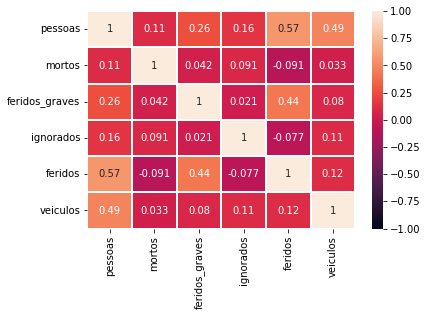

In [12]:
# Usando a biblioteca Seaborn
#sns.heatmap vai fazer uma representação grafica com cores
#plt.show() exibir grafico
sns.heatmap(df.corr(), annot=True, vmin= -1, vmax= 1, linewidths= 1)
plt.show()